↓sklearn未使用

第一主成分の主成分係数：[ 0.52106591 -0.26934744  0.5804131   0.56485654]
第二主成分の主成分係数：[-0.37741762 -0.92329566 -0.02449161 -0.06694199]


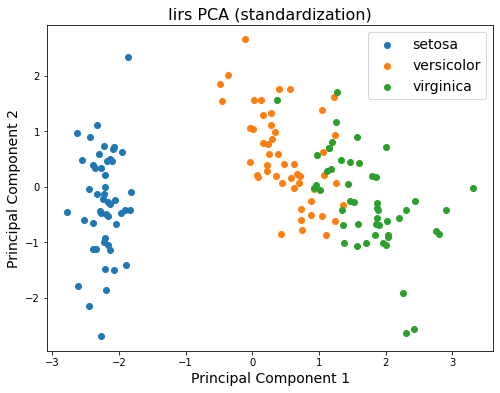

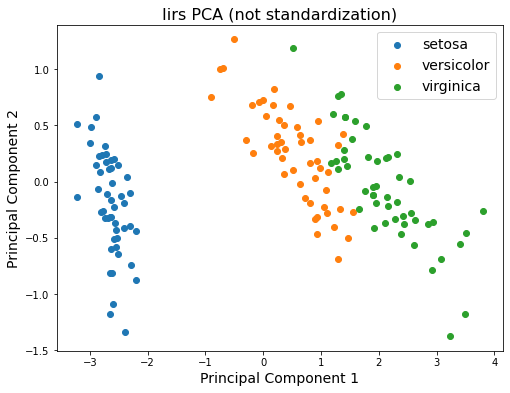

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
n = 150
m = 4

def plot(pc1,pc2,s):            #プロットする関数
  fig = plt.figure(figsize=(8,6))
  ax = fig.add_subplot(111)
  ax.scatter(pc1[0:50], pc2[0:50], label='setosa')
  ax.scatter(pc1[50:100], pc2[50:100], label='versicolor')
  ax.scatter(pc1[100:150], pc2[100:150], label='virginica')
  ax.set_xlabel('Principal Component 1', size=14)
  ax.set_ylabel('Principal Component 2', size=14)
  if s:
    ax.set_title('Iirs PCA (standardization)', size=16)
  else:
    ax.set_title('Iirs PCA (not standardization)', size=16)
  ax.legend(loc='best', fontsize=14)
  plt.show()

iris = datasets.load_iris()
data = iris.data.T
standard_data = np.array(list(map(lambda x: (x-x.mean())/x.std(),data)))  #データを標準化する
data = np.array(list(map(lambda x: (x-x.mean()),data))) #分散共分散行列を求めるために平均補正する
#参考：https://blog.shikoan.com/cov-corr-gram-matrix/#%E5%88%86%E6%95%A3%E5%85%B1%E5%88%86%E6%95%A3%E8%A1%8C%E5%88%97%E3%81%A8%E7%9B%B8%E9%96%A2%E8%A1%8C%E5%88%97%E3%81%AE%E9%96%A2%E4%BF%82%E3%80%81%E3%82%B0%E3%83%A9%E3%83%A0%E8%A1%8C%E5%88%97%E3%81%A8%E7%9B%B8%E9%96%A2%E8%A1%8C%E5%88%97%E3%81%AE%E9%96%A2%E4%BF%82

corr_data = standard_data @ standard_data.T / n  
#standard_dataの分散共分散行列(この場合は=相関行列)を求める
cov_data = data @ data.T / n                     
#dataの分散共分散行列を求める

eig_val_corr, eig_vec_corr =np.linalg.eig(corr_data)
#corr_dataの固有値，固有ベクトルを求める
eig_val_cov, eig_vec_cov =np.linalg.eig(cov_data)    
#cov_dataの固有値，固有ベクトルを求める

eig_vec1_corr = eig_vec_corr[:,0] #第1主成分の固有ベクトル（標準化あり）
eig_vec2_corr = eig_vec_corr[:,1] #第2主成分の固有ベクトル（標準化あり）
eig_vec1_cov = eig_vec_cov[:,0]   #第1主成分の固有ベクトル（標準化なし）
eig_vec2_cov = eig_vec_cov[:,1]   #第2主成分の固有ベクトル（標準化なし）

pc1_corr = standard_data.T @ eig_vec1_corr #第1主成分（標準化あり）
pc2_corr = standard_data.T @ eig_vec2_corr #第2主成分（標準化あり）
pc1_cov = data.T @ eig_vec1_cov            #第1主成分（標準化なし）
pc2_cov = data.T @ eig_vec2_cov            #第2主成分（標準化なし）

print("第一主成分の主成分係数："+ str(eig_vec1_corr))
print("第二主成分の主成分係数："+ str(eig_vec2_corr))

plot(pc1_corr, pc2_corr, True)
plot(pc1_cov, pc2_cov, False)


↓sklearn使用

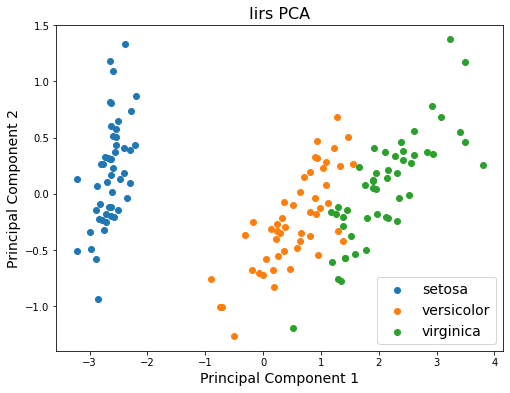

In [ ]:
from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#iris_data_scaler = scaler.fit_transform(iris.data)
pca = PCA() 
X_pca = pca.fit_transform(iris_data_scaler) 
X_pca = pca.fit_transform(iris.data) 


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.scatter(X_pca[0:50:, 0], X_pca[0:50, 1], label='setosa')
ax.scatter(X_pca[50:100, 0], X_pca[50:100, 1], label='versicolor')
ax.scatter(X_pca[100:150, 0], X_pca[100:150, 1], label='virginica')
ax.set_xlabel('Principal Component 1', size=14)
ax.set_ylabel('Principal Component 2', size=14)
ax.set_title('Iirs PCA', size=16)
ax.legend(loc='best', fontsize=14)
plt.show()

参考

https://www.kkaneko.jp/data/od/pca.html
https://momonoki2017.blogspot.com/2019/05/pythonmatplotlib03.html
http://taustation.com/pca-iris-dataset/

https://support.minitab.com/ja-jp/minitab/18/help-and-how-to/modeling-statistics/multivariate/how-to/principal-components/interpret-the-results/key-results/

https://logics-of-blue.com/principal-components-analysis/

